# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [20]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 326.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 360.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
    --------------------------------------- 0.4/15.8 MB 10.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/15.8 MB 8.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/15.8 MB 10.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.8/15.8 MB 10.2 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/15.8 MB 10.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.8/15.8 MB 10.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.8 MB 10.8 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.6 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.6 MB 6.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.6 MB 5.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.6 MB 6.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.6 MB 6.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.6 MB 6.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/11.6 MB 6.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.8/11.6 MB 6.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.6 MB 6.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.5/11.6 MB 7.0 MB/s eta 0:00:02
   ----------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.2 which is incompatible.


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 10.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 9.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.1 MB 12.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.8/12.1 MB 10.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/12.1 MB 10.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/12.1 MB 11.2 MB/s eta 0:00:01
   -------- ----------

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/46.2 MB 15.9 MB/s eta 0:00:03
    --------------------------------------- 1.0/46.2 MB 12.9 MB/s eta 0:00:04
    --------------------------------------- 1.0/46.2 MB 13.3 MB/s eta 0:00:04
    --------------------------------------- 1.0/46.2 MB 13.3 MB/s eta 0:00:04
    --------------------------------------- 1.0/46.2 MB 13.3 MB/s eta 0:00:04
   - -------------------------------------- 1.5/46.2 MB 5.6 MB/s eta 0:00:09
   - -------------------------------------- 1.9/46.2 MB 6.1 MB/s eta 0:00:08
   - -------------------------------------- 2.2/46.2 MB 6.2 MB/s eta 0:00:08
   -- ------------------------------------- 2.7/46.2 MB 6.6 MB/s eta 0:00:07
   -- ------------------------------------- 3.2/46.2 MB 7.3 MB/s eta 0:00:06
   

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.2 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.12.0 which is incompatible.


   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   ---------------------------------------  430.1/431.4 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 431.4/431.4 kB 9.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 16.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/2.0 MB 14.6 MB/s eta 0:00:01
   ----------------------------------- ---- 1.8/2.0 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.8 kB ? eta -:--:--
   ---------------------------------------- 45.8/45.8 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: pydantic
    Found exist

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.10.5 which is incompatible.


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 660.6 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/299.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 165.2 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 245.8 kB/s eta 0:00:52
     --------------------------------------- 0.1/12.8 MB 416.7 kB/s eta 0:00:31
      -------------------------------------- 0.2/12.8 MB 841.6 kB/s eta 0:00:15
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.3 MB/s eta 0:00

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations
from wordcloud import WordCloud # for counting word frequencies
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
import ast
import gensim.downloader as api
from gensim.models import KeyedVectors,Word2Vec

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()
nltk.download('stopwords')
nltk.download('wordnet')
# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# ## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
df_trueNews = pd.read_csv('True.csv')

# Import the second file - Fake.csv
df_fakeNews = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
df_trueNews.head()

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [6]:
# Inspect the DataFrame with Fake News to understand the given data
df_fakeNews.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [7]:
# Print the column details for True News DataFrame
df_trueNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
df_trueNews.tail()

,title,text,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,"August 22, 2017"


In [9]:
df_fakeNews.tail()

,title,text,date
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,"January 16, 2016"
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,"January 16, 2016"
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,"January 15, 2016"
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,"January 14, 2016"
23522,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,"January 12, 2016"


In [10]:
# Print the column details for Fake News Dataframe
df_fakeNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [11]:
# Print the column names of both DataFrames
print(df_trueNews.columns)
print(df_fakeNews.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [12]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_trueNews["news_label"] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fakeNews["news_label"] = 0

In [13]:
# checking the news_label column in fake and true news dataframe
df_trueNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       21417 non-null  object
 1   text        21417 non-null  object
 2   date        21417 non-null  object
 3   news_label  21417 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 669.4+ KB


In [14]:
df_fakeNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       23502 non-null  object
 1   text        23502 non-null  object
 2   date        23481 non-null  object
 3   news_label  23523 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 735.2+ KB


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [15]:
# Combine the true and fake news DataFrames into a single DataFrame
df = df_trueNews.merge(df_fakeNews,how='outer')
df["news_label"].value_counts()

news_label
0    23523
1    21417
Name: count, dtype: int64

In [16]:
# shuffled_df = df.sample(frac=1,random_state=42).reset_index(drop=True)
# shuffled_df.head()

In [17]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

,title,text,date,news_label
0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...,"A 10-year-old girl smacked down Donald Trump, ...","February 29, 2016",0
1,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...,"At this point, every Republican who refuses to...","June 22, 2017",0
2,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,Donald Trump has been attacking President Obam...,"November 5, 2016",0
3,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...,Massachusetts Rep. Jim McGovern brought the Ho...,"May 4, 2017",0
4,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,"August 5, 2016",0


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [18]:
# Check Presence of Null Values
#df.info()
df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [19]:
# Handle Rows with Null Values
DF = df.dropna()

In [20]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44918
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   date        44898 non-null  object
 3   news_label  44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [21]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
DF["news_text"] = DF["title"].astype('str')+' '+DF["text"].astype('str')
# Drop the irrelevant columns from the DataFrame as they are no longer needed
DF.drop(["title","text"],axis=1,inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
DF.head()

,date,news_label,news_text
0,"February 29, 2016",0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...
1,"June 22, 2017",0,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...
2,"November 5, 2016",0,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...
3,"May 4, 2017",0,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...
4,"August 5, 2016",0,#AfterTrumpImplodes Hashtag Hilariously Imagi...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [22]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [23]:
# Write the function here to clean the text and remove all the unnecessary elements
def textCleaning(dataframe, column,column_new):
    df = dataframe.copy()
    # Convert to lower case
    df[column_new] = df[column].astype(str).str.lower()
    # Remove text in square brackets
    df[column_new] = df[column_new].str.replace(r'\[.*?\]', '', regex=True)
    # Remove punctuation
    df[column_new] = df[column_new].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    # Remove words with numbers
    df[column_new] = df[column_new].apply(lambda x: ' '.join([word for word in x.split() if not any(c.isdigit() for c in word)]))
    
    return df


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [24]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
DF = textCleaning(DF,"news_text","news_text_cleaned")

In [25]:
DF.head()

,date,news_label,news_text,news_text_cleaned
0,"February 29, 2016",0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...,donald trump gets his a handed to him by a gir...
1,"June 22, 2017",0,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...,exgop congressman shreds fellow republicans fo...
2,"November 5, 2016",0,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,trump gets stomped for whining about president...
3,"May 4, 2017",0,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...,watch democratic rep delivers scathing rebuke ...
4,"August 5, 2016",0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,aftertrumpimplodes hashtag hilariously imagine...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [26]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def lemmaAndPOSTags(row_text):
    
    wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()
    
    # Tokenize the row text
    words = nltk.tokenize.word_tokenize(row_text)
    
    # Removing stop words
    words = [word for word in words if word not in nltk.corpus.stopwords.words("english")]
    
    # POS tagging the words
    wordsWithPOSTag = nltk.pos_tag(words)
    
    # Lemmatization with correct POS mapping
    lemmatized_words = []
    for word, pos_tag in wordsWithPOSTag:
        # Map NLTK POS tag to WordNet format
        if pos_tag.startswith('N'):
            wordnet_pos = 'n'
        elif pos_tag.startswith('V'):
            wordnet_pos = 'v'
        elif pos_tag.startswith('J'):
            wordnet_pos = 'a'
        elif pos_tag.startswith('R'):
            wordnet_pos = 'r'
        else:
            wordnet_pos = 'n'  # Default to noun
        
        # Lemmatize with the correct POS
        lemma = wordnet_lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_words.append((lemma, pos_tag))
    
    # Keeping only NN and NNS
    words_NN_NNS = [word for word, pos in lemmatized_words if pos == 'NN' or pos == 'NNS']
    
    return words_NN_NNS
    

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [70]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
#DF["news_text_cleaned"][0]
DF["preprocessed_text"] = DF["news_text_cleaned"].apply(lemmaAndPOSTags)
DF.head()

,date,news_label,news_text,news_text_cleaned,preprocessed_text
0,"February 29, 2016",0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...,donald trump gets his a handed to him by a gir...,"[trump, girl, video, girl, trump, amazingon, h..."
1,"June 22, 2017",0,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...,exgop congressman shreds fellow republicans fo...,"[congressman, shred, trump, impeachment, video..."
2,"November 5, 2016",0,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,trump gets stomped for whining about president...,"[trump, president, air, force, campaign, trail..."
3,"May 4, 2017",0,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...,watch democratic rep delivers scathing rebuke ...,"[watch, rep, delivers, rebuke, trumpcare, bill..."
4,"August 5, 2016",0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,aftertrumpimplodes hashtag hilariously imagine...,"[aftertrumpimplodes, imago, posttrump, world, ..."


### Save the Cleaned data as a csv file (Recommended)

In [3]:
## Recommended to perform the below steps to save time while rerunning the code
#df_clean = DF.copy()
#df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [4]:
# Check the first few rows of the DataFrame
df_clean.head(10)

,date,news_label,news_text,news_text_cleaned,news_text_token
0,"February 29, 2016",0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...,donald trump gets his a handed to him by a gir...,"['trump', 'girl', 'video', 'girl', 'trump', 'a..."
1,"June 22, 2017",0,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...,exgop congressman shreds fellow republicans fo...,"['congressman', 'shred', 'trump', 'impeachment..."
2,"November 5, 2016",0,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,trump gets stomped for whining about president...,"['trump', 'president', 'air', 'force', 'campai..."
3,"May 4, 2017",0,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...,watch democratic rep delivers scathing rebuke ...,"['watch', 'rep', 'delivers', 'rebuke', 'trumpc..."
4,"August 5, 2016",0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,aftertrumpimplodes hashtag hilariously imagine...,"['aftertrumpimplodes', 'imago', 'posttrump', '..."
5,"February 4, 2016",0,#BlackLivesMatter Leader To Run For Mayor Of ...,blacklivesmatter leader to run for mayor of ra...,"['blacklivesmatter', 'leader', 'mayor', 'polic..."
6,"July 13, 2017",0,#BringBackObama Hashtag Blows Up On Twitter A...,bringbackobama hashtag blows up on twitter as ...,"['bringbackobama', 'hashtag', 'twitter', 'amer..."
7,"March 2, 2016",0,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,freechrischristie twitter reacts to the ‘hosta...,"['twitter', 'reacts', 'situation', 'trump', 's..."
8,"August 13, 2016",0,#MakeAmericaBrannigan: Futurama Voice Actor R...,makeamericabrannigan futurama voice actor read...,"['voice', 'actor', 'quote', 'tweet', 'voice', ..."
9,"March 1, 2017",0,#NeverTrump Conservative Has The PERFECT Desc...,nevertrump conservative has the perfect descri...,"['description', 'pundit', 'reaction', 'trump',..."


In [5]:
df_clean.drop('date', axis=1)

,news_label,news_text,news_text_cleaned,news_text_token
0,0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...,donald trump gets his a handed to him by a gir...,"['trump', 'girl', 'video', 'girl', 'trump', 'a..."
1,0,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...,exgop congressman shreds fellow republicans fo...,"['congressman', 'shred', 'trump', 'impeachment..."
2,0,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,trump gets stomped for whining about president...,"['trump', 'president', 'air', 'force', 'campai..."
3,0,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...,watch democratic rep delivers scathing rebuke ...,"['watch', 'rep', 'delivers', 'rebuke', 'trumpc..."
4,0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,aftertrumpimplodes hashtag hilariously imagine...,"['aftertrumpimplodes', 'imago', 'posttrump', '..."
...,...,...,...,...
44893,0,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,“you’re hired” trump pulls unemployed vet from...,"['trump', 'pull', 'vet', 'audience', 'hire', '..."
44894,0,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,“you’re hired” trump pulls unemployed vet from...,"['trump', 'pull', 'vet', 'audience', 'hire', '..."
44895,0,“Your rights are NOT superior to mine!” JUDGE ...,“your rights are not superior to mine” judge j...,"['right', 'mine', 'judge', 'jeanine', 'let', '..."
44896,0,“You’re Not Welcome!” Obama As Welcome At Rose...,“you’re not welcome” obama as welcome at roseb...,"['roseberg', 'funeral', 'church', 'member', 'r..."


In [6]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 5)

In [7]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               44898 non-null  object
 1   news_label         44898 non-null  int64 
 2   news_text          44898 non-null  object
 3   news_text_cleaned  44889 non-null  object
 4   news_text_token    44898 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
# Since preprocessed_text is not list but a str we need to change it for further analysis
import ast
df_clean['news_text_token'] = df_clean['news_text_token'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [9]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
X = df_clean[['news_text','news_text_cleaned','news_text_token','news_label']]
y = df_clean['news_label']
train_df, test_df, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of train_df: (31428, 6)
Shape of test_df: (13470, 4)
Shape of y_train: (31428,)
Shape of y_test: (13470,)


In [10]:
train_df.head()

,news_text,news_text_cleaned,news_text_token,news_label
13970,COLLEGE STUDENTS ASKED How To Achieve The Amer...,college students asked how to achieve the amer...,"[college, student, dream, stuff, bernie, sander]",0
41668,Vatican vows to seek truth about diplomat in c...,vatican vows to seek truth about diplomat in c...,"[vow, truth, diplomat, child, pornography, cas...",1
26810,Myriad of ways the CIA tried (and failed) to a...,myriad of ways the cia tried and failed to ass...,"[way, assassinate, fidel, cuban, revolution, f...",0
30967,Republican Rubio projected to win Puerto Rico:...,republican rubio projected to win puerto rico ...,"[rubio, rico, medium, washington, reuters, can...",1
26072,"May Brexit offer would hurt, cost EU citizens ...",may brexit offer would hurt cost eu citizens e...,"[offer, cost, eu, citizen, brussels, reuters, ...",1


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [11]:
# Add a new column to calculate the character length of cleaned news text
train_df["char_length_news_text_cleaned"] = train_df["news_text_cleaned"].apply(lambda x: len(str(x)))
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df["char_length_preproccesed_text"] = train_df["news_text_token"].apply(lambda x: len(str(x)))

In [12]:
train_df["news_text_token"].head()

13970     [college, student, dream, stuff, bernie, sander]
41668    [vow, truth, diplomat, child, pornography, cas...
26810    [way, assassinate, fidel, cuban, revolution, f...
30967    [rubio, rico, medium, washington, reuters, can...
26072    [offer, cost, eu, citizen, brussels, reuters, ...
Name: news_text_token, dtype: object

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

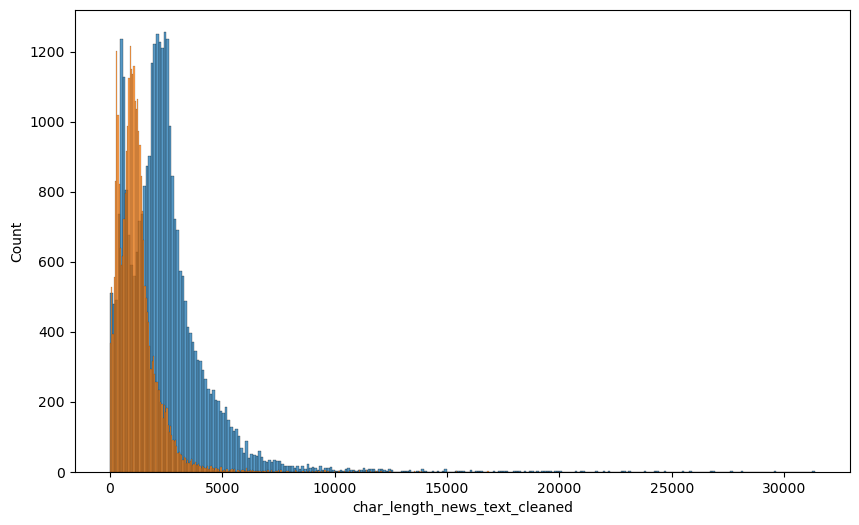

In [13]:
# Create a histogram plot to visualise character lengths
 
plt.figure(figsize=(10, 6))
# Add histogram for cleaned news text
sns.histplot(train_df["char_length_news_text_cleaned"])
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df["char_length_preproccesed_text"])
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

Top 40 Word Frequencies:
state': 10279
year': 9768
government': 9170
trump': 7452
people': 6738
country': 6708
week': 5945
month': 5436
time': 5134
group': 4744
official': 4392
statement': 4138
president': 3935
day': 3906
law': 3311
plan': 3205
support': 3169
party': 3150
issue': 3144
administration': 3111
part': 3043
leader': 3032
policy': 3004
election': 3003
way': 2847
washington' reuters': 2768
campaign': 2753
company': 2666
lawmaker': 2575
case': 2517
decision': 2504
effort': 2491
deal': 2484
report': 2441
nation': 2438
power': 2413
vote': 2398
china': 2380
work': 2362
comment': 2355


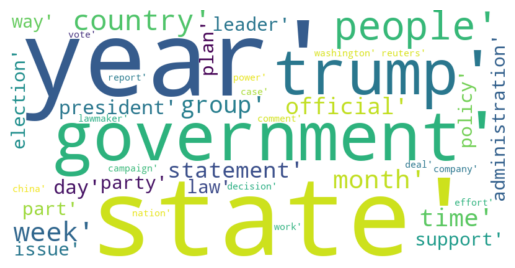

In [58]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = train_df[train_df['news_label'] == 1]['news_text_token']
all_true_text = ' '.join(true_news_text.astype(str).tolist())
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(all_true_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

word_frequencies=wordcloud.process_text(all_true_text)
top_40 = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:40]

# Print top 40
print("Top 40 Word Frequencies:")
for word, freq in top_40:
    print(f"{word}: {freq}")

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

Top 40 Word Frequencies:
trump': 13832
people': 12565
time': 8777
president': 8501
year': 7604
state': 7172
way': 5777
clinton': 5608
country': 5126
medium': 4893
day': 4884
woman': 4802
thing': 4752
house': 4480
government': 4166
fact': 4132
news': 3970
man': 3724
party': 3656
group': 3533
campaign': 3480
donald' trump': 3460
report': 3445
week': 3438
video': 3304
world': 3275
part': 3061
case': 3043
statement': 3038
obama': 2991
family': 2947
american': 2907
today': 2882
something': 2872
nation': 2810
question': 2776
point': 2775
nothing': 2745
administration': 2742
democrat': 2712


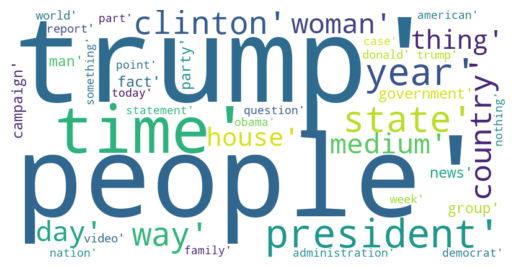

In [59]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = train_df[train_df['news_label'] == 0]['news_text_token']
all_fake_text = ' '.join(fake_news_text.astype(str).tolist())
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(all_fake_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

word_frequencies=wordcloud.process_text(all_fake_text)
top_40 = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:40]

# Print top 40
print("Top 40 Word Frequencies:")
for word, freq in top_40:
    print(f"{word}: {freq}")


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [16]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text, n, top_k=10):
 
    #tokens = nltk.word_tokenize(text)
    ngram_list = list(nltk.ngrams(text, n))
    ngram_freq = Counter(ngram_list)
    top_ngrams = ngram_freq.most_common(top_k)  # Get top k frequent n-grams
    
    
    ngrams = [' '.join(gram) for gram, freq in top_ngrams]
    freqs = [freq for gram, freq in top_ngrams]

    # Plotting
    plt.figure(figsize=(10,6))
    plt.barh(ngrams, freqs, color='skyblue')
    plt.xlabel("Frequency")
    plt.title(f"Top {top_k} {n}-grams")
    plt.gca().invert_yaxis()  # To show the highest frequency on top
    plt.show()
    
    return top_ngrams

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [17]:
# Handle NaN values in the text data
has_nan = train_df['news_text_token'].isna()
print("Any NaN values:", has_nan)

Any NaN values: 13970    False
41668    False
26810    False
30967    False
26072    False
         ...  
11284    False
44732    False
38158    False
860      False
15795    False
Name: news_text_token, Length: 31428, dtype: bool


###### No NaN Values found

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

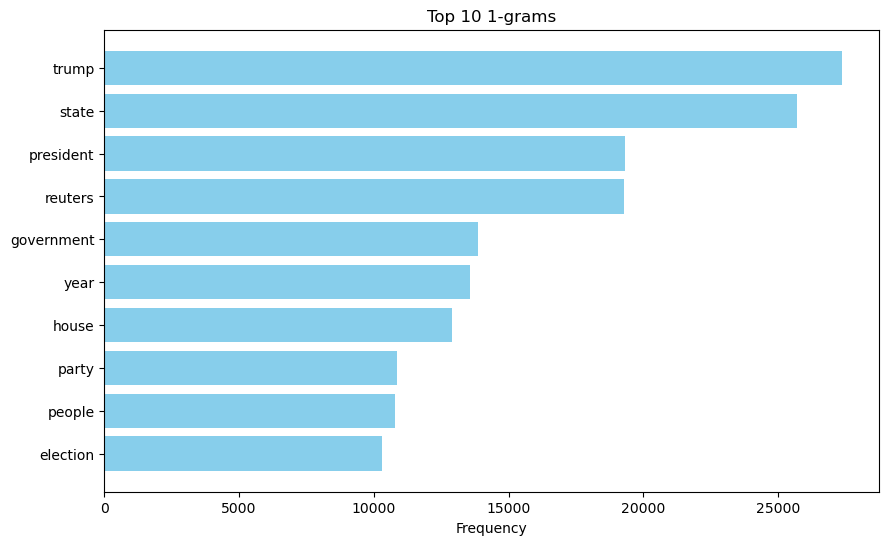

Top 10 Unigrams: [(('trump',), 27384), (('state',), 25709), (('president',), 19325), (('reuters',), 19294), (('government',), 13880), (('year',), 13560), (('house',), 12913), (('party',), 10848), (('people',), 10774), (('election',), 10314)]


In [18]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

true_news_text = train_df[train_df['news_label'] == 1]['news_text_token']
all_tokens = [token for sublist in true_news_text for token in sublist]
top_unigrams = get_top_ngrams(all_tokens, n=1, top_k=10)
print("Top 10 Unigrams:", top_unigrams)

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



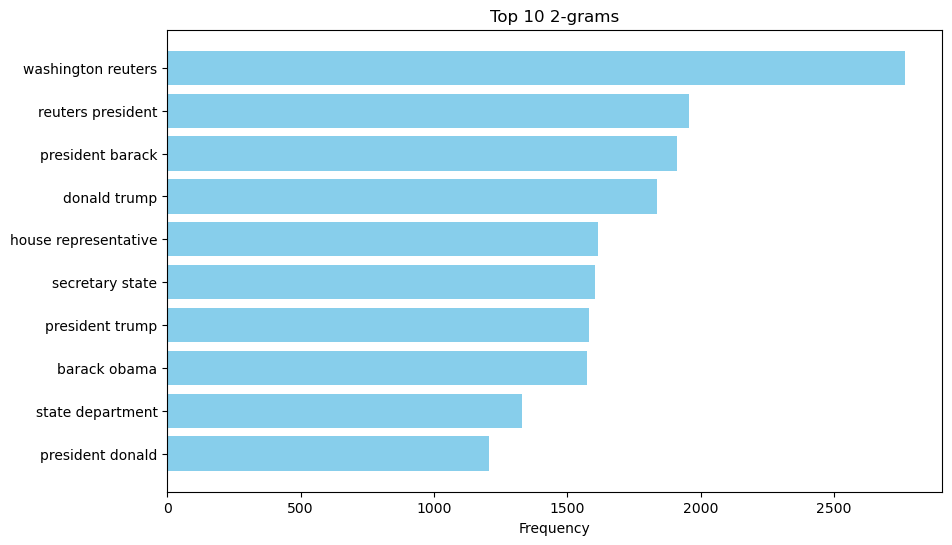

Top 10 Bigrams: [(('washington', 'reuters'), 2768), (('reuters', 'president'), 1958), (('president', 'barack'), 1912), (('donald', 'trump'), 1836), (('house', 'representative'), 1616), (('secretary', 'state'), 1606), (('president', 'trump'), 1581), (('barack', 'obama'), 1575), (('state', 'department'), 1331), (('president', 'donald'), 1205)]


In [19]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(all_tokens, n=2, top_k=10)
print("Top 10 Bigrams:", top_unigrams)

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



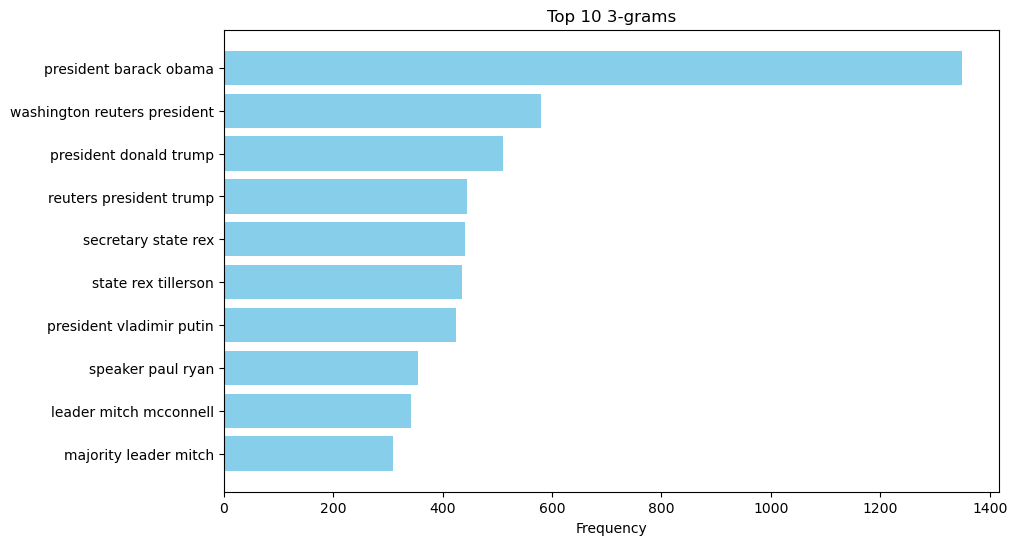

Top 10 Trigrams: [(('president', 'barack', 'obama'), 1349), (('washington', 'reuters', 'president'), 580), (('president', 'donald', 'trump'), 511), (('reuters', 'president', 'trump'), 445), (('secretary', 'state', 'rex'), 441), (('state', 'rex', 'tillerson'), 436), (('president', 'vladimir', 'putin'), 424), (('speaker', 'paul', 'ryan'), 355), (('leader', 'mitch', 'mcconnell'), 343), (('majority', 'leader', 'mitch'), 309)]


In [20]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(all_tokens, n=3, top_k=10)
print("Top 10 Trigrams:", top_unigrams)

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

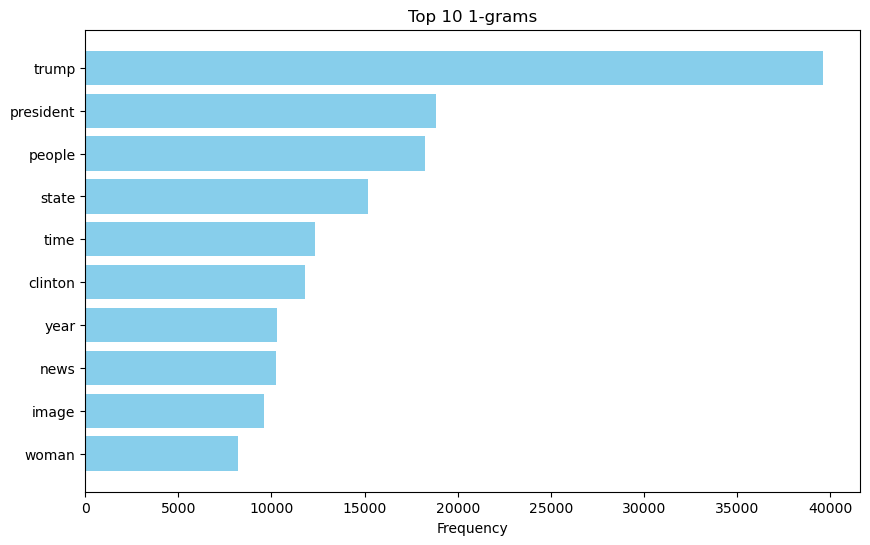

Top 10 Unigrams: [(('trump',), 39630), (('president',), 18849), (('people',), 18239), (('state',), 15203), (('time',), 12344), (('clinton',), 11786), (('year',), 10305), (('news',), 10244), (('image',), 9605), (('woman',), 8182)]


In [21]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news_text = train_df[train_df['news_label'] == 0]['news_text_token']
all_tokens_fake = [token for sublist in fake_news_text for token in sublist]
top_unigrams_fake = get_top_ngrams(all_tokens_fake, n=1, top_k=10)
print("Top 10 Unigrams:", top_unigrams_fake)

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



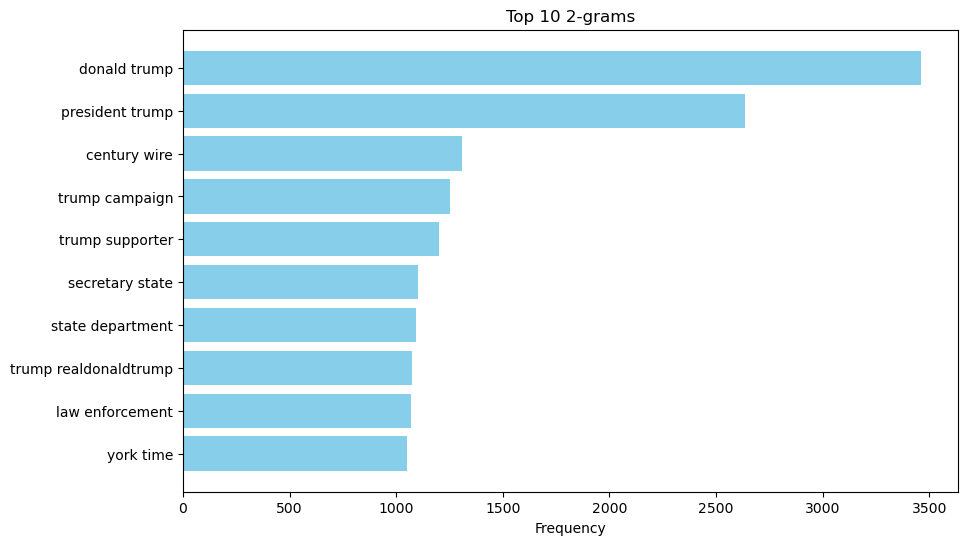

Top 10 Bigrams: [(('donald', 'trump'), 3460), (('president', 'trump'), 2633), (('century', 'wire'), 1307), (('trump', 'campaign'), 1253), (('trump', 'supporter'), 1203), (('secretary', 'state'), 1100), (('state', 'department'), 1092), (('trump', 'realdonaldtrump'), 1072), (('law', 'enforcement'), 1070), (('york', 'time'), 1050)]


In [22]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(all_tokens_fake, n=2, top_k=10)
print("Top 10 Bigrams:", top_unigrams_fake)

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



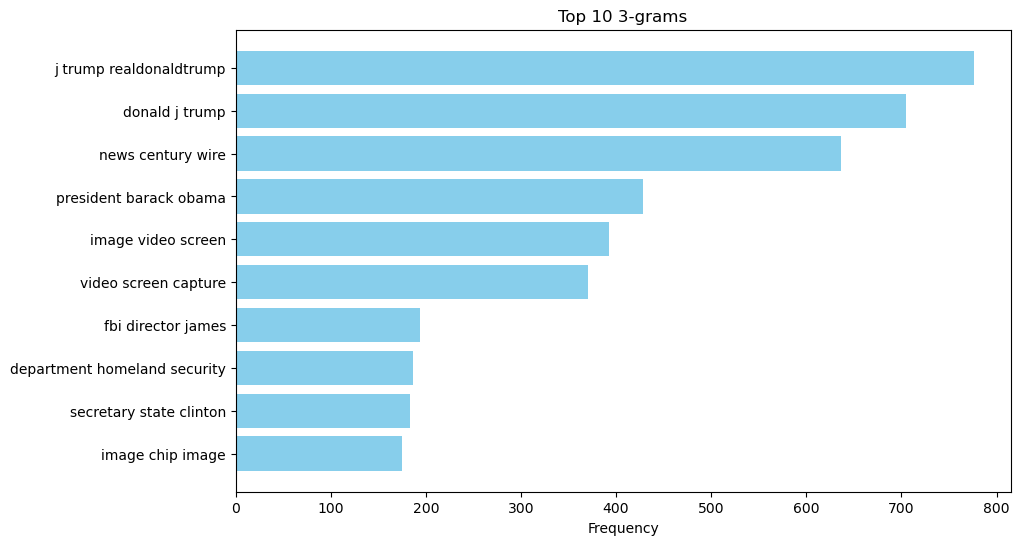

Top 10 Trigrams: [(('j', 'trump', 'realdonaldtrump'), 776), (('donald', 'j', 'trump'), 705), (('news', 'century', 'wire'), 637), (('president', 'barack', 'obama'), 428), (('image', 'video', 'screen'), 393), (('video', 'screen', 'capture'), 371), (('fbi', 'director', 'james'), 194), (('department', 'homeland', 'security'), 187), (('secretary', 'state', 'clinton'), 183), (('image', 'chip', 'image'), 175)]


In [23]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(all_tokens_fake, n=3, top_k=10)
print("Top 10 Trigrams:", top_unigrams_fake)

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [45]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [46]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [47]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [48]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [49]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [50]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [51]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [52]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [53]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [54]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [55]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [56]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [25]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
word2vec_model = api.load('word2vec-google-news-300')

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [26]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
## Extract the target variable for the training data and validation data
def get_text_vector(tokens_list, model):
    vectors = []
    for token in tokens_list:
        if token in word2vec_model:
            vectors.append(word2vec_model[token])
            
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Now apply to your train and valid sets

# For training set
train_vectors = train_df['news_text_token'].apply(lambda x: get_text_vector(x, word2vec_model))
test_vectors = test_df['news_text_token'].apply(lambda x: get_text_vector(x, word2vec_model))


print("Training vectors shape:", train_vectors.shape)
print("Validation vectors shape:", test_vectors.shape)


Training vectors shape: (31428,)
Validation vectors shape: (13470,)


In [52]:
train_vectors.dtype

dtype('O')

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [29]:
train_df.drop('news_label',axis=1)
test_df.drop('news_label',axis=1)

,news_text,news_text_cleaned,news_text_token
22216,"If threatened, U.S. will 'totally destroy' Nor...",if threatened us will totally destroy north ko...,"[trump, vow, nation, reuters, president, trump..."
27917,OAS says Honduran vote results in doubt due to...,oas says honduran vote results in doubt due to...,"[oas, vote, result, irregularity, reuters, obs..."
25007,Lebanon's Aoun says PM Hariri's freedom restri...,lebanons aoun says pm hariris freedom restrict...,"[lebanon, pm, hariris, freedom, beirut, reuter..."
1377,Cruz LITERALLY Steals Line From Legendary Mov...,cruz literally steals line from legendary movi...,"[cruz, line, movie, wife, donald, trump, video..."
32476,STUNNING PHOTOS EMERGE Of West Point Graduate ...,stunning photos emerge of west point graduate ...,"[photo, point, graduate, infantry, officer, an..."
...,...,...,...
35343,Taking back control: UK's classic blue-and-gol...,taking back control uks classic blueandgold pa...,"[control, blueandgold, passport, reuters, mini..."
21632,House committee passes sweeping tax bill WASHI...,house committee passes sweeping tax bill washi...,"[house, committee, tax, bill, washington, reut..."
25863,Maine Democratic lawmaker blasted for threaten...,maine democratic lawmaker blasted for threaten...,"[maine, lawmaker, post, trump, editor, attenti..."
16315,Defense Secretary Mattis promises support to U...,defense secretary mattis promises support to u...,"[defense, secretary, mattis, support, ukraine,..."


In [43]:
# Convert to 2D numpy array
train_input = np.array(train_vectors.tolist())
test_input = np.array(test_vectors.tolist())
print("Training input shape:", train_input.shape)
print("Validation input shape:", test_input.shape)

Training input shape: (31428, 300)
Validation input shape: (13470, 300)


In [44]:
logreg = LogisticRegression()
logreg.fit(train_input, y_train)
y_pred = logreg.predict(test_input)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [45]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [46]:
# Classification Report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9327394209354121
Precision: 0.9255668491008601
Recall: 0.9322727988659631
F1-score: 0.9289077212806027


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [48]:
# 1. Initialize Decision Tree model
decisiontree = DecisionTreeClassifier(random_state=42)  

# 2. Train Decision Tree model on training data
decisiontree.fit(train_input, y_train)

# 3. Predict on validation data
y_pred_dt = decisiontree.predict(test_input)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [50]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [51]:
# Classification Report
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

Accuracy: 0.847290274684484
Precision: 0.8514575827055355
Recall: 0.8188691132461805
F1-score: 0.8348454435969489


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [55]:
## Initialise Random Forest model
randomforest = RandomForestClassifier(random_state=42)  

## Train Random Forest model on training data
randomforest.fit(train_input, y_train)

## Predict on validation data
y_pred_rf = randomforest.predict(test_input)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [56]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [57]:
# Classification Report
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.9279881217520416
Precision: 0.9288789666719821
Recall: 0.9174673176878249
F1-score: 0.9231378763866878


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

#### The acurrancy of decision tree model is less than Random forest and Logistic regression model by approximately 10%.
#### With the help of Logistic regression and Random forest we are able to detect the fake new with an accuracy of approximately 92%
#### After lemmatization, the data reduced significantly which helped us with faster model training.
#### Using Unigram, Bigram and Trigram we are able to capture different word combination and identify the most frequently occuring phrase.